### Smart Drone Network (SDN)

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import random as random
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [ ]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

-----------

In [ ]:
def random_ID(N):
        letters = ["A", "B", "C", "D","E",\
               "F", "G", "H", "I", "J",\
               "K", "L", "M", "N", "O",\
               "P", "Q", "R", "S", "T",\
               "U", "V", "W", "X", "Y", "Z"]
        numbers = [str(i) for i in range(10)]
        ID = ""
        for k in range(N):
            t = random.choice([0,1])
            if t == 0: ID = ID + random.choice(letters)
            else: ID = ID + random.choice(numbers)
        
        return ID

### This is Pokhara!

In [4]:
xc = 28.2096
yc = 83.9856
s = 0.1
dx = 0.001
dy = 0.001
X = np.arange(xc-s,xc+s,dx)
Y = np.arange(yc-s,yc+s,dy)
len(X),len(Y)

(201, 200)

#### Random Position

In [5]:
import random as random

LAT = []
LONG = []
G = nx.Graph()
POS = {}
k = 0
for i in range(30):
    for j in range(30):
        x = random.choice(X)
        y = random.choice(Y)
        LAT.append(x)
        LONG.append(y)
        POS.update({k:[x,y]})
        k = k+1

In [6]:
len(LAT), len(LONG)

(900, 900)

### Generate A random Network

In [7]:
G  = nx.random_geometric_graph(200, radius = 0.025 ,pos=POS, dim=2, p=2, seed=None)

In [8]:
nx.info(G)

'Graph with 200 nodes and 918 edges'

In [9]:
pos = nx.get_node_attributes(G, 'pos')

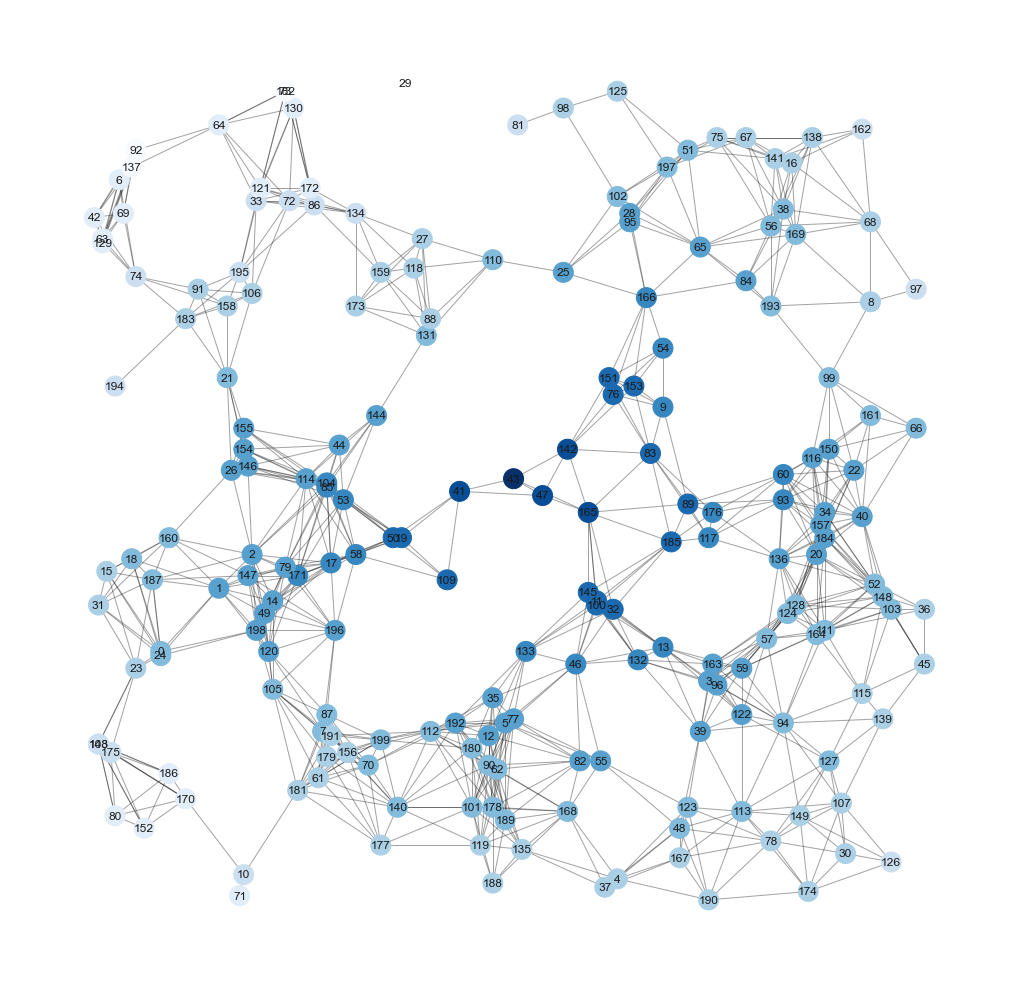

In [10]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))


plt.figure(figsize=(18, 18))
pos = POS
nx.draw_networkx_edges(G, pos,\
                       nodelist=[ncenter],\
                       alpha=0.4)

nx.draw_networkx_nodes(G, pos,\
                       nodelist=list(p.keys()),
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(G,pos)

#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

### Prepare geolocation coordinates

In [11]:
LINE = []
for e in list(G.edges()):
    f = e[0]
    t = e[1]
    LINE.append({"lat":[pos[f][0],pos[t][0]],"long":[pos[f][1],pos[t][1]]})

In [12]:
LAT_node = []
LONG_node = []
for n in list(G.nodes()):
    LAT_node.append(pos[n][0])
    LONG_node.append(pos[n][1])

### Geo Location

In [13]:
import gmplot 
  
gmap3 = gmplot.GoogleMapPlotter(xc,yc, 15) 
  
# scatter method of map object  
# scatter points on the google map 
gmap3.scatter( LAT_node,LONG_node,'red', size = 100, marker = False ) 
        
# Plot method Draw a line in 
# between given coordinates 

for item in LINE:
    gmap3.plot(item['lat'],item['long'],  
           'cornflowerblue', edge_width = 1.5) 
gmap3.draw( "pokhara-lattice.html" ) 

In [14]:
k = 0
for node in G.nodes():
    print(node,"|",[n for n in G.neighbors(node)])
    k = k+1
    if k>5:
        break

0 | [1, 15, 18, 23, 24, 31, 187, 198]
1 | [0, 2, 14, 18, 24, 49, 79, 120, 147, 160, 171, 187, 198]
2 | [1, 14, 17, 26, 49, 79, 85, 104, 114, 120, 146, 147, 160, 171, 187, 198]
3 | [13, 39, 57, 59, 94, 96, 122, 124, 132, 163]
4 | [37, 48, 123, 135, 167, 168, 190]
5 | [12, 35, 46, 55, 62, 77, 82, 90, 101, 112, 133, 178, 180, 189, 192]


### Minimal Spanning Tree

In [15]:
T=nx.minimum_spanning_tree(G)

In [16]:
print(sorted(T.edges(data=True)))

[(0, 1, {}), (0, 15, {}), (0, 18, {}), (0, 23, {}), (0, 24, {}), (0, 31, {}), (0, 187, {}), (0, 198, {}), (1, 2, {}), (1, 14, {}), (1, 49, {}), (1, 79, {}), (1, 120, {}), (1, 147, {}), (1, 160, {}), (1, 171, {}), (2, 17, {}), (2, 26, {}), (2, 85, {}), (2, 104, {}), (2, 114, {}), (2, 146, {}), (3, 13, {}), (3, 39, {}), (3, 57, {}), (3, 59, {}), (3, 94, {}), (3, 96, {}), (3, 122, {}), (3, 124, {}), (3, 132, {}), (3, 163, {}), (4, 37, {}), (4, 48, {}), (4, 123, {}), (4, 135, {}), (4, 167, {}), (4, 168, {}), (4, 190, {}), (5, 12, {}), (5, 35, {}), (5, 46, {}), (5, 55, {}), (5, 62, {}), (5, 77, {}), (5, 82, {}), (5, 90, {}), (5, 101, {}), (5, 112, {}), (5, 133, {}), (5, 178, {}), (5, 180, {}), (5, 189, {}), (5, 192, {}), (6, 42, {}), (6, 63, {}), (6, 69, {}), (6, 74, {}), (6, 92, {}), (6, 129, {}), (6, 137, {}), (7, 61, {}), (7, 70, {}), (7, 87, {}), (7, 105, {}), (7, 120, {}), (7, 156, {}), (7, 179, {}), (7, 181, {}), (7, 191, {}), (7, 196, {}), (7, 199, {}), (8, 68, {}), (8, 97, {}), (8, 

(28.08859999999997, 28.330600000000267, 83.86543999999991, 84.09776000000103)

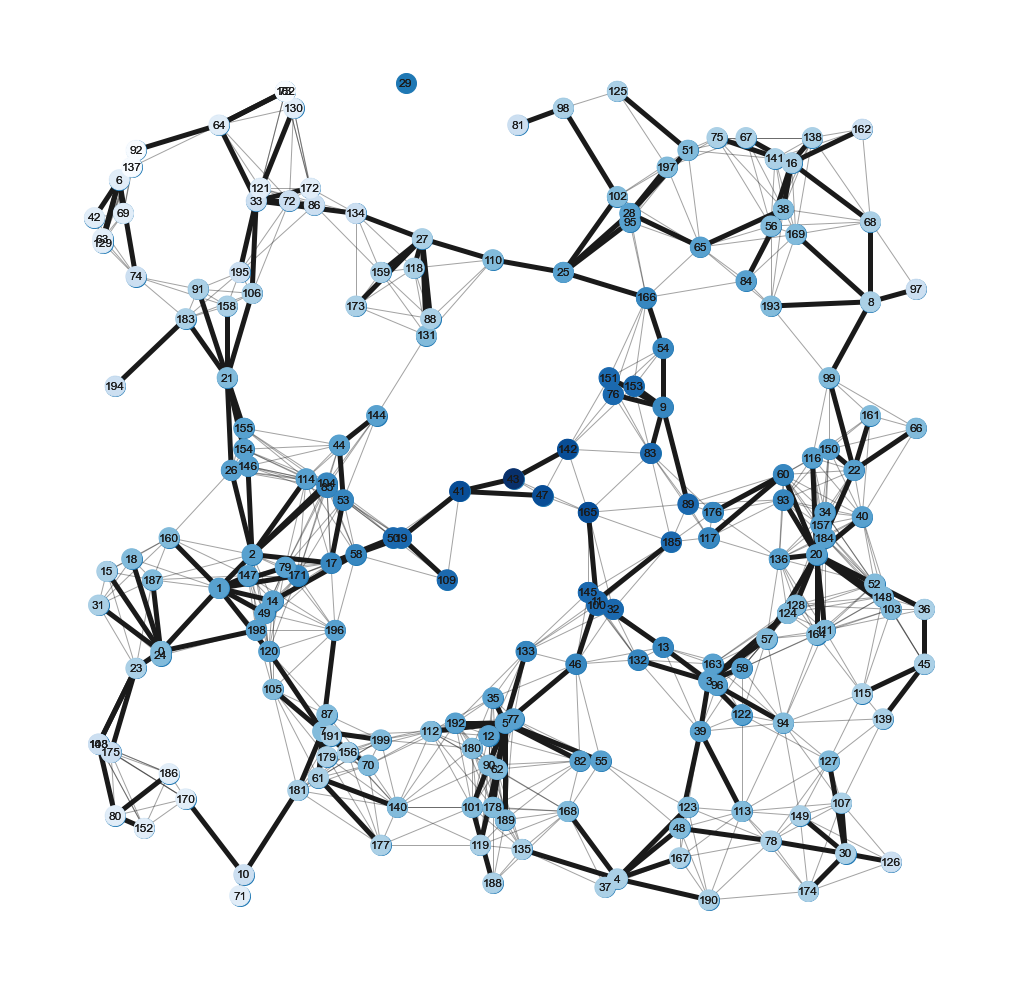

In [43]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d


plt.figure(figsize=(18, 18))
pos = POS

nx.draw_networkx_edges(T, pos,nodelist=[ncenter],width = 5.0,alpha=1.0)

nx.draw_networkx_nodes(T, pos,node_size=400,cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(T,pos)

nx.draw_networkx_edges(G, pos, nodelist=[ncenter],alpha=0.4)

nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),  node_size=400, node_color=list(p.values()), cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(G,pos)




#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis('off')

### Defth First Search

In [21]:
DFS = nx.dfs_tree(G,0)

In [22]:
print(sorted(DFS.edges(data=True)))

[(0, 1, {}), (1, 2, {}), (2, 14, {}), (3, 13, {}), (4, 37, {}), (5, 12, {}), (6, 42, {}), (7, 61, {}), (8, 97, {}), (8, 99, {}), (9, 54, {}), (10, 71, {}), (10, 170, {}), (11, 32, {}), (12, 35, {}), (13, 11, {}), (14, 17, {}), (15, 18, {}), (16, 56, {}), (17, 19, {}), (18, 24, {}), (19, 41, {}), (20, 22, {}), (21, 91, {}), (22, 34, {}), (23, 15, {}), (23, 143, {}), (24, 31, {}), (25, 28, {}), (26, 21, {}), (27, 88, {}), (28, 51, {}), (30, 107, {}), (31, 160, {}), (32, 46, {}), (33, 72, {}), (34, 40, {}), (35, 62, {}), (36, 45, {}), (37, 135, {}), (38, 16, {}), (39, 94, {}), (40, 52, {}), (41, 43, {}), (42, 63, {}), (43, 47, {}), (44, 85, {}), (45, 103, {}), (46, 5, {}), (47, 142, {}), (48, 4, {}), (49, 79, {}), (50, 58, {}), (51, 65, {}), (52, 36, {}), (53, 44, {}), (54, 151, {}), (55, 48, {}), (56, 67, {}), (57, 3, {}), (58, 104, {}), (58, 109, {}), (58, 196, {}), (59, 39, {}), (60, 20, {}), (61, 87, {}), (62, 77, {}), (63, 69, {}), (64, 33, {}), (64, 137, {}), (65, 38, {}), (66, 150,

(28.08859999999997, 28.330600000000267, 83.86543999999991, 84.09776000000103)

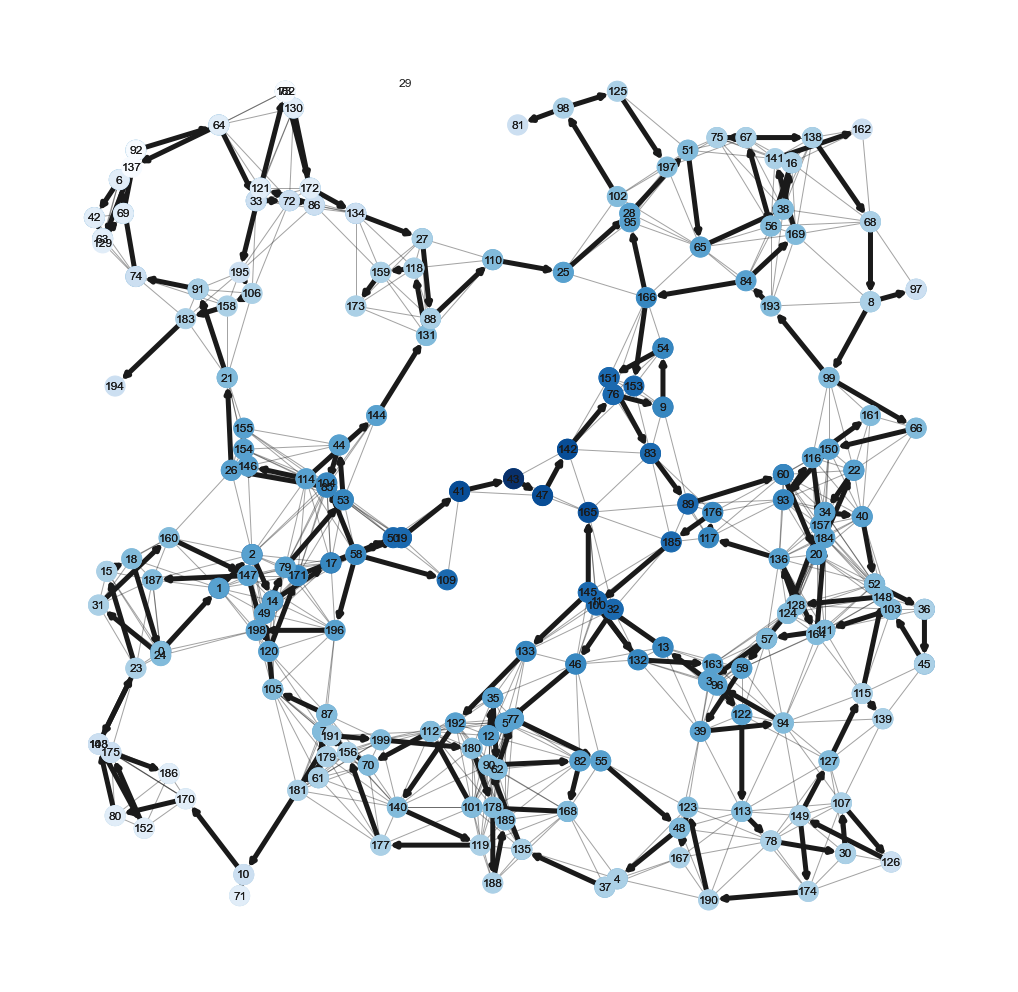

In [42]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d


plt.figure(figsize=(18, 18))
pos = POS





nx.draw_networkx_edges(DFS, pos, nodelist=[ncenter], width = 5.0, alpha=1.0)

nx.draw_networkx_nodes(DFS, pos,  node_size=400,node_color=list(p.values()),cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(DFS,pos)



nx.draw_networkx_edges(G, pos,nodelist=[ncenter], alpha=0.4)

nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),  node_size=400, node_color=list(p.values()),cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(G,pos)




#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis('off')

### Breadth First Searh

In [30]:
BFS = nx.bfs_tree(G,0)

(28.08859999999997, 28.330600000000267, 83.86543999999991, 84.09776000000103)

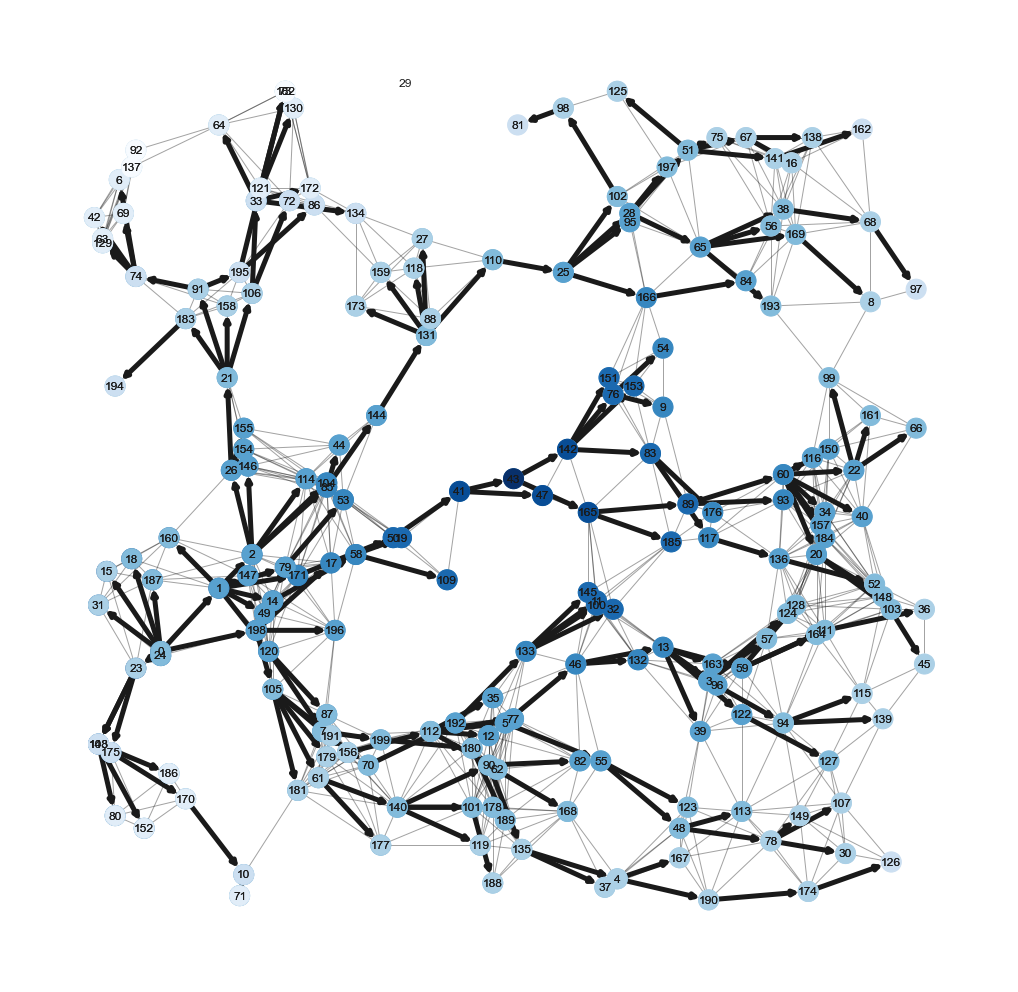

In [31]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d


plt.figure(figsize=(18, 18))
pos = POS





nx.draw_networkx_edges(BFS, pos, nodelist=[ncenter], width = 5.0, alpha=1.0)

nx.draw_networkx_nodes(BFS, pos,node_size=400,node_color=list(p.values()),cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(BFS,pos)



nx.draw_networkx_edges(G, pos, nodelist=[ncenter],  alpha=0.4)

nx.draw_networkx_nodes(G, pos,nodelist=list(p.keys()),node_size=400,node_color=list(p.values()),cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(G,pos)




#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis('off')

### The Shortest Path

In [34]:
path = nx.shortest_path(G,2,119)
path_edges1 = []
for i in range(len(path)-1):
    path_edges1.append((path[i],path[i+1]))
path_edges1

[(2, 120), (120, 7), (7, 61), (61, 140), (140, 119)]

In [35]:
path = nx.shortest_path(G,79,50)
path_edges2 = []
for i in range(len(path)-1):
    path_edges2.append((path[i],path[i+1]))
path_edges2

[(79, 17), (17, 50)]

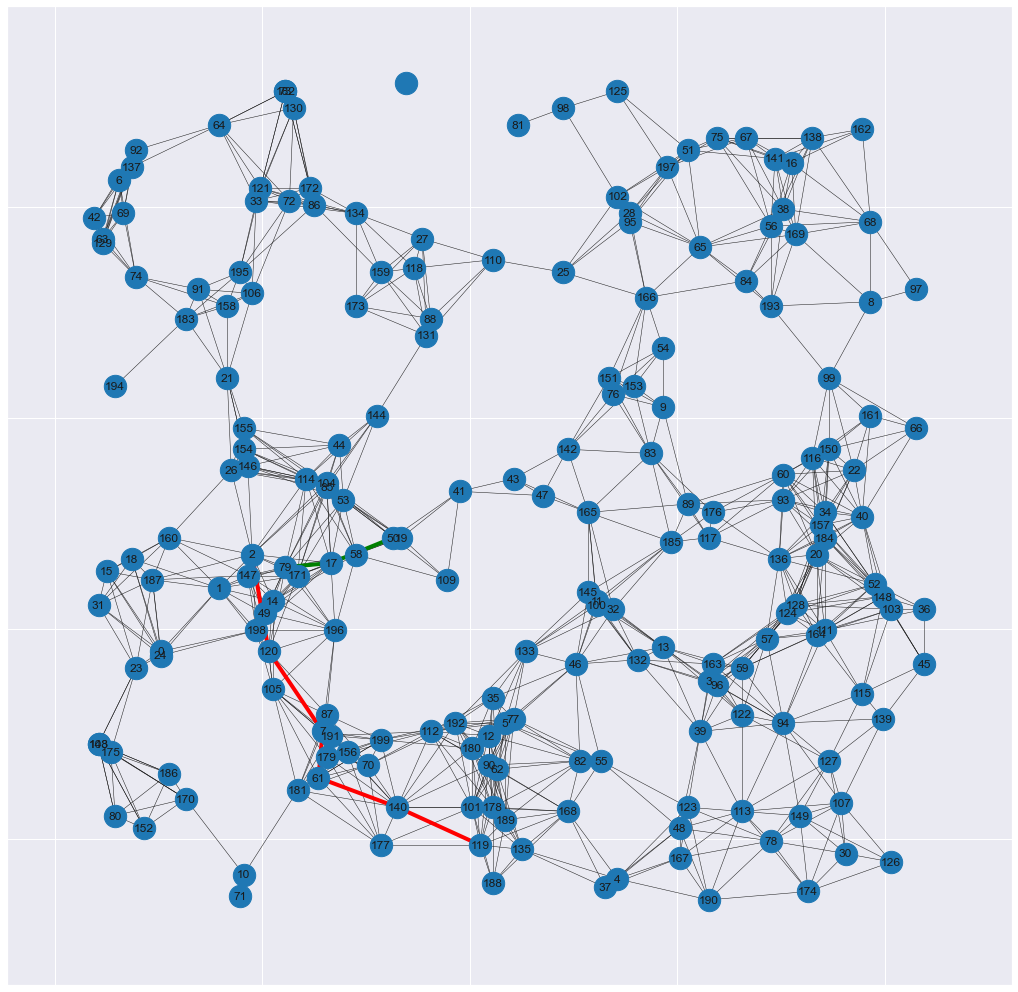

In [41]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d


plt.figure(figsize=(18, 18))
pos = POS

nx.draw_networkx_edges(G, pos,nodelist=[ncenter], width = 0.5, alpha=1.0)

nx.draw_networkx_nodes(G, pos, node_size=500)

nx.draw_networkx_labels(DFS,pos)


nx.draw_networkx_edges(G, pos, edge_color = "red",  width =4,edgelist = path_edges1)
nx.draw_networkx_edges(G, pos, edge_color = "GREEN", width =4,edgelist = path_edges2)

### Project Shortest Path

- **Generate random graph over Kathmandu with 200 nodes**. 
- **Find the Minimal Spanning Tree**. 
- **Find the shoetest Path between two nodes below and color them with different colors.** 
    - (1) 41, 179 
    - (2) 1, 49
    - (3) 21, 150 
- **Calculate the total cost of the path based on the number of edges**.